In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential


In [0]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D


In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [0]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('/content/drive/My Drive/movie/Movies-Poster_Dataset/train.csv')

In [0]:
data.shape

(7254, 27)

In [0]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
img_width = 350
img_height = 350

In [0]:
X = []

In [0]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/drive/My Drive/movie/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

  

100%|██████████| 7254/7254 [00:50<00:00, 143.16it/s]


In [0]:
X.shape


(7254, 350, 350, 3)

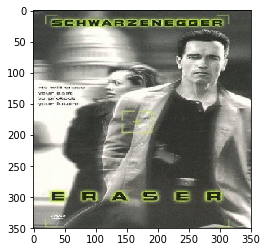

In [0]:
plt.imshow(X[2250])

In [0]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train , X_test , y_train , y_test =  train_test_split(X,y,random_state = 0,test_size = 0.15)
X_train[0].shape

(350, 350, 3)

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_29 (Batc (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 86, 86, 32)       

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 259s 42ms/sample - loss: 0.6903 - accuracy: 0.6503 - val_loss: 0.4586 - val_accuracy: 0.8397
Epoch 2/5
6165/6165 [==============================] - 246s 40ms/sample - loss: 0.3071 - accuracy: 0.8935 - val_loss: 0.3373 - val_accuracy: 0.9066
Epoch 3/5
6165/6165 [==============================] - 244s 40ms/sample - loss: 0.2606 - accuracy: 0.9076 - val_loss: 0.3103 - val_accuracy: 0.9053
Epoch 4/5
6165/6165 [==============================] - 238s 39ms/sample - loss: 0.2539 - accuracy: 0.9080 - val_loss: 0.2759 - val_accuracy: 0.9068
Epoch 5/5
6165/6165 [==============================] - 222s 36ms/sample - loss: 0.2458 - accuracy: 0.9112 - val_loss: 0.2646 - val_accuracy: 0.9068


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

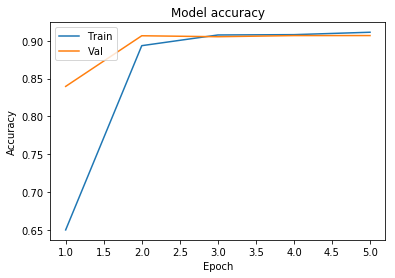

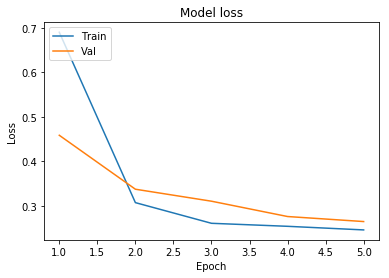

In [0]:
plot_learningCurve(history, 5)





Drama
Action
Thriller


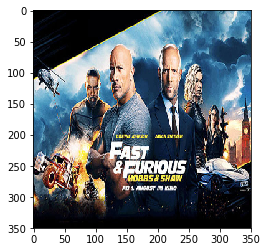

In [0]:
img = image.load_img('/content/drive/My Drive/movie/Movies-Poster_Dataset/fast.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)
#classes = data.columns[2:]
#print(classes)
Y_prob = model.predict(img)
top3 = np.argsort(Y_prob[0])[:-4 :-1]
for i in range(3):
  print(classes[top3[i]])